In [1]:
import shap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [83]:
#pip install tensorflow==2.10

  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached protobuf-3.19.6-cp310-cp310-win_amd64.whl (895 kB)
  Using cached wrapt-1.15.0-cp310-cp310-win_amd64.whl (36 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp310-cp310-win_amd64.whl (1.5 MB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached pyasn1_modules-0.3.0-py2.py3-none-any.whl (181 kB)
  Using cached rsa-4.9-py3-none-any.whl (34 kB)
  Using cached cachetools-5.3.1-py3-none-any.whl (9.3 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-

You should consider upgrading via the 'c:\Users\paulo\PycharmProjects\VG_October2023\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [84]:
#pip install keras

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\paulo\PycharmProjects\VG_October2023\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:

df = pd.read_csv("NASH_trial_class.txt", sep=",")
# df = df.groupby('Dx').apply(lambda x: x.sample(1000)).reset_index(drop=True)
df['Dx'].value_counts()


Dx
0    5000
1    5000
Name: count, dtype: int64

In [3]:
df

,Dx,ABDOMINAL_CIRCUMFERENCE,ALT,AST,BMI,CASUAL_BLOOD_SUGAR,DIASTOLIC_BP,FASTING_BLOOD_SUGAR,G_GT,HBA1C,HDL_CHOLESTEROL,LDL_CHOLESTEROL,SERUM_CREATININE,SERUM_URIC_ACID,SYSTOLIC_BP,TRIGLYCERIDE
0,0,83.000000,39.0,30.0,23.300000,98.380116,76,100.0,43.0,5.400000,78.0,135.0,0.870000,6.000000,129,176.0
1,0,87.300000,55.0,29.0,22.200000,100.555147,82,94.0,52.0,5.600000,59.0,164.0,0.990000,7.800000,126,127.0
2,0,91.000000,34.0,27.0,26.500000,99.713073,69,95.0,27.0,5.200000,44.0,127.0,0.740000,5.500000,116,133.0
3,0,89.500000,33.0,28.0,25.300000,103.444940,69,111.0,16.0,5.861117,60.0,149.0,0.832952,5.913579,119,117.0
4,0,90.000000,34.0,30.0,26.900000,98.604929,97,52.0,33.0,5.900000,94.0,130.0,1.020000,6.285483,131,228.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,102.000000,61.0,52.0,30.000000,114.394927,81,124.0,40.0,6.900000,78.0,77.0,0.888250,6.463450,142,78.0
9996,1,82.600000,62.0,48.0,23.300000,100.434982,86,109.0,252.0,5.700000,90.0,118.0,0.790000,6.669449,133,388.0
9997,1,86.718585,39.0,27.0,24.736096,105.356061,78,135.0,64.0,5.100000,35.0,76.0,0.848129,6.076548,128,134.0
9998,1,95.000000,31.0,34.0,29.200000,109.466042,100,113.0,95.0,5.800000,94.0,153.0,0.880000,6.535115,144,114.0


In [4]:

y = df['Dx']
X =  df.loc[:, df.columns != 'Dx'].values
features = df.columns[df.columns != 'Dx']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [5]:

model = make_pipeline(
    StandardScaler(),
    MLPRegressor(hidden_layer_sizes=(20,10,5),
                 activation='logistic',
                 max_iter=10000,
                 learning_rate='invscaling',
                 random_state=0)
)

model.fit(X_train,y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpregressor',
                 MLPRegressor(activation='logistic',
                              hidden_layer_sizes=(20, 10, 5),
                              learning_rate='invscaling', max_iter=10000,
                              random_state=0))])

In [14]:
pd.concat(
    [
    pd.DataFrame(y_test).reset_index(drop=True), 
    pd.DataFrame(model.predict(X_test))
    ], axis=1
    ).groupby(['Dx']).mean()

,0
Dx,
0,0.275542
1,0.722429


In [6]:
X_test

array([[ 83.5       ,  46.        ,  32.        , ...,   6.28949105,
        141.        ,  82.        ],
       [ 77.        ,  22.        ,  21.        , ...,   5.57418213,
        117.        ,  65.        ],
       [ 73.5       ,  11.        ,  15.        , ...,   5.17386272,
        104.        ,  62.        ],
       ...,
       [ 97.        ,  38.        ,  34.        , ...,   6.7       ,
        188.        , 110.        ],
       [ 89.5       , 157.        ,  80.        , ...,   7.5854654 ,
        160.        , 118.        ],
       [ 88.        , 340.        , 167.        , ...,   9.        ,
        143.        , 119.        ]])

In [7]:
pd.DataFrame(model.predict(X_test))

,0
0,0.661278
1,0.098392
2,0.043996
3,0.149942
4,0.066932
...,...
3295,0.140943
3296,0.898041
3297,0.473843
3298,0.893889


In [13]:
pd.DataFrame(model.predict(X_test)).value_counts()

-0.011740    1
 0.798628    1
 0.796628    1
 0.797670    1
 0.797676    1
            ..
 0.209383    1
 0.209651    1
 0.209910    1
 0.210020    1
 0.899254    1
Name: count, Length: 3300, dtype: int64



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



<Axes: ylabel='Density'>

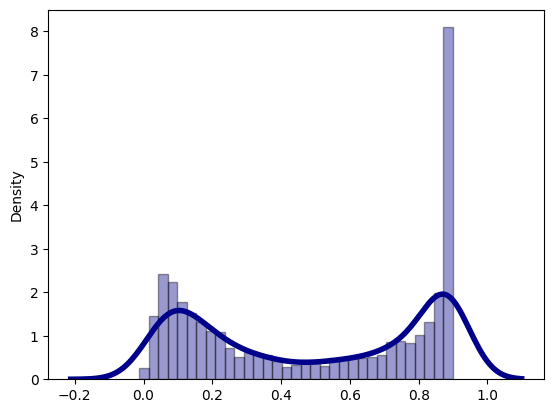

In [17]:
sns.distplot(pd.DataFrame(model.predict(X_test)), hist=True, kde=True, 
             bins=int(3300/100), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


In [82]:

explainer = shap.KernelExplainer(model.predict,X_train)

shap_values = explainer.shap_values(X_test, nsamples=100)

Using 1340 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/660 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


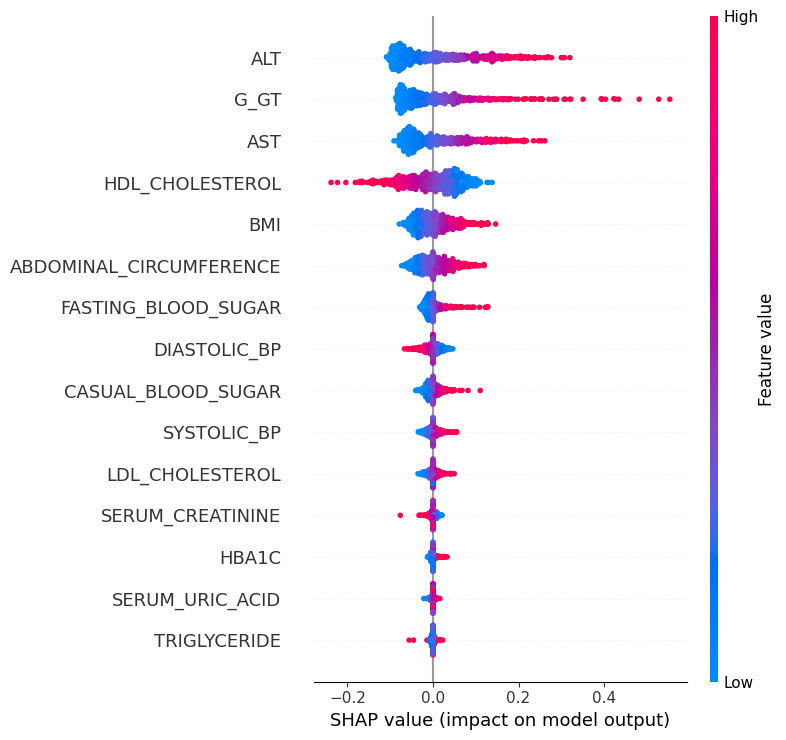

In [45]:

shap.summary_plot(shap_values,X_test,feature_names=features)


In [46]:

shap.initjs()

shap.force_plot(explainer.expected_value,
                shap_values[0 ,:],
                X_test[0,:],
                feature_names=features)


In [48]:

shap.initjs()

shap.force_plot(explainer.expected_value,
                shap_values[41 ,:],
                X_test[41,:],
                feature_names=features)


In [49]:

shap.initjs()

shap.force_plot(explainer.expected_value,
                shap_values[39 ,:],
                X_test[39,:],
                feature_names=features)


In [50]:

shap.initjs()

shap.force_plot(explainer.expected_value,
                shap_values[51 ,:],
                X_test[51,:],
                feature_names=features)


In [69]:
matplotlib.pyplot.plot(model.loss_curve_)

AttributeError: 'Pipeline' object has no attribute 'loss_curve_'